In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0] / "src")
# in standard python

if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import data_processing as dp
import health_score_source

In [4]:
# pip install sklearn
connector = dp.establish_connection()

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://newrelic.okta.com/app/snowflake/exkugjs4xeGHw0Vo10x7/sso/saml?SAMLRequest=lZJBb%2BIwEIX%2FSuQ9J3YCiGIBFQXRUtGCCu1hb95kAm4SO%2BtxSLq%2Ffp1QVt2VWmlvlv3e%2BJt5M75uitw7gUGp1YSEASMeqFgnUh0m5Hm%2F9K%2BIh1aoRORawYS8AZLr6RhFkZd8VtmjeoKfFaD1XCGFvHuYkMoorgVK5EoUgNzGfDd7WPMoYLw02upY5%2BSD5WuHQARjHeHFkqB0eEdrS05pXddB3Qu0OdCIMUbZiDpVK%2Fl20Teup0%2F0IWX9Vu8UTr59Z7uR6jyCr7B%2BnEXI7%2Fb7rb%2Fd7PbEm11Q51phVYDZgTnJGJ6f1mcAdAQKagO5jB2CnwgrNAaodJ3mIoNYF2VlXdnAnWgKCc31QbrOV4sJKTOZ7IZhY3vz%2B404Ls2qecjEKTquZbphaXZrfsnNQL%2Fe3M9nI6lj4r1coo3aaFeIFaxUG6h1Vywa%2BGzg99ieDTkLeX8U9MKr78RbuEClErZz%2Fksd6MyKjk6UJf0DTqHJqsMr9hu4vavZiw5ZM6SImrYBk%2FPO8I7ATP97EmP60f6%2Bf48uktViq12BN2%2BpTSHs54mFQdjdyMRPOymHQsh8liQGEF1yea7ruQFh3ZpbUwGh0%2FOvfy%2F69Dc%3D&RelayState=ver

In [14]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [23]:
# Pull data from Snowflake using raw_query
query = health_score_source.query()
df = dp.fetch_data(query, connector)

In [24]:
df.head()

,SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_NAME,SFDC_ACCOUNT_ID,REPORT_AS_OF_DT,REPORT_MONTH,LATEST_EFFECTIVE_ACR,SEGMENT_NAME,CHURN_RISK_SCORE_HSCORE,SENTIMENT_SCORE_HSCORE,ENGAGEMENT_SCORE_HSCORE,RENEWAL_URGENCY_MONTHS_HSCORE,REVENUE_GROWTH_HSCORE,CONTRACT_LENGTH_SCORE_HSCORE,USER_ACTIVATION_PERCENTAGE_HSCORE,PRODUCT_STICKINESS_RATIO_HSCORE,USER_STICKINESS_RATIO_HSCORE,PRODUCT_UTILIZATION_RATE_HSCORE,OVERAGE_SCORE_HSCORE,RESOLUTION_RATE_HSCORE,OPEN_TICKETS_HSCORE,AVG_CSAT_SCORE_HSCORE,PCT_P1_CASES_HSCORE,PCT_P1P2_CASES_HSCORE,MTHLY_FTTR_50_HSCORE,MAXIMUM_DAYS_PAST_DUE_HSCORE,SUM_TOTAL_AMOUNT_DUE_HSCORE,PCT_M_PLUS_6_BCM,PCT_M_PLUS_12_BCM,TARGET_M_PLUS_6_BCM,TARGET_M_PLUS_12_BCM
0,258317,DaisyBill LLC,0011U00001S8bCHQAZ,2025-05-26,2025-05-01,23538.700000000,Late Volume Plan,None,100.00,100.00,None,43.03,50.00,None,28.56693903206,0E-11,0E-11,None,None,None,None,None,None,None,None,None,-100.000000000000,-100.000000000000,None,None
1,693978,Indiana Farmers Mutual Insurance,0011U00001S900EQAR,2025-01-31,2025-01-01,14511.600000000,Early Volume Plan,29.00,100.00,91.00,None,0.00,25.00,60.86797735711,71.43306096794,0E-11,0E-11,4.17956656347,None,None,None,None,None,None,100.00000000000,100.00000000000,-100.000000000000,-100.000000000000,None,None
2,2906726,e-MDs,0011U00001S8ay3QAB,2025-03-31,2025-03-01,44268.000000000,Early Volume Plan,2.00,59.00,83.00,None,61.01,25.00,48.69438188569,71.43306096794,42.95789473684,43.82669671926,12.53869969040,100.00000000000,6.25000000000,None,100.00000000000,100.00000000000,97.90473529823,100.00000000000,100.00000000000,-100.000000000000,-100.000000000000,None,None
3,4509177,HistoryIT,001Ph00000GMRRlIAP,2024-12-31,2024-12-01,0E-9,Others,None,65.00,50.00,None,50.00,None,60.86797735711,14.28346951603,0E-11,0E-11,None,None,None,None,None,None,None,100.00000000000,100.00000000000,-100.000000000000,-100.000000000000,None,None
4,4369680,Getport,001Ph0000087vY5IAI,2025-03-31,2025-03-01,152532.180000000,Early Savings Plan,4.00,70.00,70.00,None,50.00,25.00,56.52200377381,42.85040854808,52.80701754386,72.45179063361,None,None,None,None,None,None,None,100.00000000000,100.00000000000,-100.000000000000,-100.000000000000,None,None


In [25]:
df.shape

(577587, 30)

In [26]:
import pandas as pd
import numpy as np

# Filter for Late Savings Plan segment and ensure PCT_M_PLUS_6_BCM is numeric
late_savings = df[df['SEGMENT_NAME'] == 'Late Savings Plan'].copy()

# Define percentiles to extract
percentiles = [0.10, 0.25, 0.50, 0.75, 0.90]
results = {}

for pct in percentiles:
    # Calculate quantile value for LATEST_EFFECTIVE_ACR
    acr_val = late_savings['LATEST_EFFECTIVE_ACR'].astype(float).quantile(pct)
    # Find rows closest to the percentile value
    subset = late_savings.iloc[(late_savings['LATEST_EFFECTIVE_ACR'].astype(float) - acr_val).abs().argsort()]
    # Drop duplicates by account, keep first 10
    subset = subset.drop_duplicates('SUBSCRIPTION_ACCOUNT_ID').head(10)
    results[f"{int(pct*100)}th_percentile"] = subset[['SUBSCRIPTION_ACCOUNT_ID','SFDC_ACCOUNT_NAME', 'LATEST_EFFECTIVE_ACR']]

# Collate all percentile account rows into a single DataFrame for further processing
all_percentile_accounts = pd.concat(results.values(), ignore_index=True)
for label, accounts in results.items():
    print(f"\nAccounts at {label}:")
    display(accounts)


Accounts at 10th_percentile:


,SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_NAME,LATEST_EFFECTIVE_ACR
414730,342602,NBCUniversal,30000.000000000
463508,4374892,HWL Ebsworth Lawyers,30000.000000000
73921,4005955,Health Gorilla,30000.000000000
472938,3851150,eClinical Solutions,30000.000000000
318752,703834,Travelnet Solutions Inc.,30230.100000000
537115,4472327,Duoc UC,30249.840000000
350285,3160681,"The Dairy Farm Company, IKEA",29640.000000000
443431,4260301,Misli - Demiroren Hipodrom,29577.840000000
450448,1880172,"Twentyseven Global, LLC",30528.070000000
147157,377865,Memnon,29100.000000000



Accounts at 25th_percentile:


,SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_NAME,LATEST_EFFECTIVE_ACR
336071,2946592,Lereta LLC,81000.000000000
498662,2596454,PT Map Active,80000.000000000
243498,1212102,Thunderhead Limited,80000.000000000
251028,245443,AfterShip,80000.000000000
261982,203197,"SugarCRM, Inc.",80000.000000000
240449,2820654,"Block, Inc.",80000.000000000
269590,2934918,Rubix,82000.000000000
275397,3815064,Viettel IDC,80000.000000000
279486,2656349,BigChange Limited,80000.000000000
288863,2878643,Trulieve,80000.000000000



Accounts at 50th_percentile:


,SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_NAME,LATEST_EFFECTIVE_ACR
289038,901863,Fat Zebra Pty. Ltd.,185880.000000000
542598,228560,Lyst Ltd.,186000.000000000
554703,1317506,"Extended Stay America, Inc.",186360.000000000
307124,363921,"Sharecare, Inc.",185520.000000000
70032,980742,Pure Gym Limited,186667.920000000
317248,865180,Bose Corporation,185000.000000000
128408,5608,"Arcadia Solutions, LLC",185000.000000000
168278,1285370,"Automotive Rentals, Inc.",187000.000000000
549103,CC-0000288795,Anomali,187000.000000000
105222,349705,Harland Clarke Holdings Corp.,187368.000000000



Accounts at 75th_percentile:


,SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_NAME,LATEST_EFFECTIVE_ACR
73438,3796918,Generali Italia SpA,413160.000000000
124602,154542,Farm Credit Services of America,411656.000000000
386600,649190,Earnest Operations LLC,411494.100000000
191304,661978,Drizly Inc,410000.000000000
153262,4201419,Sobek Auto India Private Limited,418458.000000000
228268,272264,D ELEKTRONİK ŞANS OYUNLARI VE YAYINCILIK A.Ş.,418720.000000000
396967,3100622,JTI,419260.000000000
26804,3373926,"Gather Presence, Inc.",405904.000000000
176112,692732,Eagle Eye Solutions Group PLC,420516.000000000
501121,1747307,"Globalization Partners, LLC",404400.000000000



Accounts at 90th_percentile:


,SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_NAME,LATEST_EFFECTIVE_ACR
299677,265563,The BetMakers,1166670.000000000
406330,485789,Australia Post Digital Services,1152440.000000000
289703,1964701,The Weather Company,1194600.000000000
471900,845842,"Entrata, Inc.",1200000.000000000
202312,1210898,"Domino Data Lab, Inc.",1200000.000000000
495263,546825,"DraftKings, Inc.",1200000.000000000
475086,721478,Turo Inc.,1129980.000000000
125240,3734878,Schweizerische Bundesbahnen,1204380.000000000
190798,2657732,Groupe M6,1122460.800000000
470138,308408,"Oportun, Inc.",1226500.000000000


In [28]:
filtered_df = df[df['SUBSCRIPTION_ACCOUNT_ID'].isin(all_percentile_accounts['SUBSCRIPTION_ACCOUNT_ID'])]
filtered_df.shape
# all_percentile_accounts.shape


(1339, 30)

In [29]:
filtered_df

,SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_NAME,SFDC_ACCOUNT_ID,REPORT_AS_OF_DT,REPORT_MONTH,LATEST_EFFECTIVE_ACR,SEGMENT_NAME,CHURN_RISK_SCORE_HSCORE,SENTIMENT_SCORE_HSCORE,ENGAGEMENT_SCORE_HSCORE,RENEWAL_URGENCY_MONTHS_HSCORE,REVENUE_GROWTH_HSCORE,CONTRACT_LENGTH_SCORE_HSCORE,USER_ACTIVATION_PERCENTAGE_HSCORE,PRODUCT_STICKINESS_RATIO_HSCORE,USER_STICKINESS_RATIO_HSCORE,PRODUCT_UTILIZATION_RATE_HSCORE,OVERAGE_SCORE_HSCORE,RESOLUTION_RATE_HSCORE,OPEN_TICKETS_HSCORE,AVG_CSAT_SCORE_HSCORE,PCT_P1_CASES_HSCORE,PCT_P1P2_CASES_HSCORE,MTHLY_FTTR_50_HSCORE,MAXIMUM_DAYS_PAST_DUE_HSCORE,SUM_TOTAL_AMOUNT_DUE_HSCORE,PCT_M_PLUS_6_BCM,PCT_M_PLUS_12_BCM,TARGET_M_PLUS_6_BCM,TARGET_M_PLUS_12_BCM
64,272264,D ELEKTRONİK ŞANS OYUNLARI VE YAYINCILIK A.Ş.,0011U00001S8ml4QAB,2024-09-30,2024-09-01,418720.000000000,Late Savings Plan,None,50.00,50.00,None,80.21,50.00,58.43325826283,42.85040854808,37.87017543860,9.26621587779,None,100.00000000000,0E-11,None,None,None,100.00000000000,100.00000000000,100.00000000000,28.631551790692,-100.000000000000,34699.647411057000,None
215,2657732,Groupe M6,0011U00001S8gBkQAJ,2025-05-26,2025-05-01,1122460.800000000,Late Savings Plan,None,65.00,65.00,None,60.13,50.00,65.32351329965,71.43306096794,0E-11,0E-11,None,None,None,None,None,None,None,None,None,-100.000000000000,-100.000000000000,None,None
269,692732,Eagle Eye Solutions Group PLC,0011U00001S8X7CQAV,2025-01-31,2025-01-01,420516.000000000,Late Savings Plan,3.00,56.00,74.00,None,0.00,75.00,51.85342991052,57.13387806411,38.24912280702,78.88805409467,None,25.37313432836,6.25000000000,None,100.00000000000,100.00000000000,90.92051962565,100.00000000000,100.00000000000,-100.000000000000,-100.000000000000,None,None
292,692732,Eagle Eye Solutions Group PLC,0011U00001S8X7CQAV,2025-02-28,2025-02-01,420516.000000000,Late Savings Plan,3.00,65.00,83.00,None,0.00,75.00,51.85342991052,85.71653048397,28.09824561404,59.92987728525,None,None,None,None,None,None,None,100.00000000000,100.00000000000,-100.000000000000,-100.000000000000,None,None
478,4472327,Duoc UC,0011U00001S8a2tQAB,2025-01-31,2025-01-01,30249.840000000,Late Savings Plan,20.00,100.00,100.00,None,50.00,25.00,91.30196603567,14.28346951603,44.83859649123,94.49035812672,None,None,None,None,None,None,None,100.00000000000,100.00000000000,-100.000000000000,-100.000000000000,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576252,845842,"Entrata, Inc.",0011U00001S8oeoQAB,2023-09-30,2023-09-01,1200000.000000000,Late Savings Plan,None,None,None,None,11.97,25.00,62.78531864386,None,35.83508771930,100.00000000000,2.01238390093,100.00000000000,6.25000000000,None,100.00000000000,100.00000000000,94.41262746194,100.00000000000,100.00000000000,24.714165986133,12.786105778720,126173.321728171000,114105.703216331000
576468,1747307,"Globalization Partners, LLC",0011U00001S8i3LQAR,2022-12-31,2022-12-01,404400.000000000,Late Savings Plan,None,None,None,None,50.00,25.00,60.86797735711,None,0E-11,None,None,None,None,None,None,None,None,None,None,40.471715837355,69.870999874173,33296.010804928333,40264.523100175333
576696,721478,Turo Inc.,0011U00001S8iUYQAZ,2024-07-31,2024-07-01,1129980.000000000,Late Savings Plan,None,None,None,None,0.00,50.00,61.23318522126,28.56693903206,38.02456140351,100.00000000000,None,50.74626865672,12.50000000000,None,100.00000000000,100.00000000000,80.44419611678,100.00000000000,100.00000000000,-8.730930274218,-100.000000000000,96824.617999990333,None
577160,245443,AfterShip,0011U00001S8huZQAR,2024-08-31,2024-08-01,80000.000000000,Late Savings Plan,None,None,None,None,58.20,25.00,60.86797735711,0E-11,36.93333333333,77.93638868019,None,None,None,None,None,None,None,100.00000000000,100.00000000000,43.749636515525,-100.000000000000,8984.352282220333,None


In [30]:
filtered_df.columns

Index(['SUBSCRIPTION_ACCOUNT_ID', 'SFDC_ACCOUNT_NAME', 'SFDC_ACCOUNT_ID',
       'REPORT_AS_OF_DT', 'REPORT_MONTH', 'LATEST_EFFECTIVE_ACR',
       'SEGMENT_NAME', 'CHURN_RISK_SCORE_HSCORE', 'SENTIMENT_SCORE_HSCORE',
       'ENGAGEMENT_SCORE_HSCORE', 'RENEWAL_URGENCY_MONTHS_HSCORE',
       'REVENUE_GROWTH_HSCORE', 'CONTRACT_LENGTH_SCORE_HSCORE',
       'USER_ACTIVATION_PERCENTAGE_HSCORE', 'PRODUCT_STICKINESS_RATIO_HSCORE',
       'USER_STICKINESS_RATIO_HSCORE', 'PRODUCT_UTILIZATION_RATE_HSCORE',
       'OVERAGE_SCORE_HSCORE', 'RESOLUTION_RATE_HSCORE', 'OPEN_TICKETS_HSCORE',
       'AVG_CSAT_SCORE_HSCORE', 'PCT_P1_CASES_HSCORE', 'PCT_P1P2_CASES_HSCORE',
       'MTHLY_FTTR_50_HSCORE', 'MAXIMUM_DAYS_PAST_DUE_HSCORE',
       'SUM_TOTAL_AMOUNT_DUE_HSCORE', 'PCT_M_PLUS_6_BCM', 'PCT_M_PLUS_12_BCM',
       'TARGET_M_PLUS_6_BCM', 'TARGET_M_PLUS_12_BCM'],
      dtype='object')

In [34]:
adoption_score_columns = ['USER_ACTIVATION_PERCENTAGE_HSCORE', 'PRODUCT_STICKINESS_RATIO_HSCORE',
       'USER_STICKINESS_RATIO_HSCORE', 'PRODUCT_UTILIZATION_RATE_HSCORE']
engagement_score_columns = ['ENGAGEMENT_SCORE_HSCORE', 'OPEN_TICKETS_HSCORE','AVG_CSAT_SCORE_HSCORE']
risk_score_columns = ['PCT_P1_CASES_HSCORE', 'PCT_P1P2_CASES_HSCORE', 'RESOLUTION_RATE_HSCORE','CHURN_RISK_SCORE_HSCORE', 'SENTIMENT_SCORE_HSCORE','RENEWAL_URGENCY_MONTHS_HSCORE','MTHLY_FTTR_50_HSCORE']
financial_score_columns = ['REVENUE_GROWTH_HSCORE','OVERAGE_SCORE_HSCORE','CONTRACT_LENGTH_SCORE_HSCORE']


filtered_df['adoption_score_avg'] = filtered_df[adoption_score_columns].astype(float).mean(axis=1)
filtered_df['engagement_score_avg'] = filtered_df[engagement_score_columns].astype(float).mean(axis=1)
filtered_df['risk_score_avg'] = filtered_df[risk_score_columns].astype(float).mean(axis=1)
filtered_df['financial_score_avg'] = filtered_df[financial_score_columns].astype(float).mean(axis=1)


/var/folders/vn/04tfqd6j3hjbf_jcx4zc00ph0000gp/T/ipykernel_66217/1329759444.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['adoption_score_avg'] = filtered_df[adoption_score_columns].astype(float).mean(axis=1)
/var/folders/vn/04tfqd6j3hjbf_jcx4zc00ph0000gp/T/ipykernel_66217/1329759444.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['engagement_score_avg'] = filtered_df[engagement_score_columns].astype(float).mean(axis=1)
/var/folders/vn/04tfqd6j3hjbf_jcx4zc00ph0000gp/T/ipyke

In [35]:
filtered_df.head()

,SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_NAME,SFDC_ACCOUNT_ID,REPORT_AS_OF_DT,REPORT_MONTH,LATEST_EFFECTIVE_ACR,SEGMENT_NAME,CHURN_RISK_SCORE_HSCORE,SENTIMENT_SCORE_HSCORE,ENGAGEMENT_SCORE_HSCORE,RENEWAL_URGENCY_MONTHS_HSCORE,REVENUE_GROWTH_HSCORE,CONTRACT_LENGTH_SCORE_HSCORE,USER_ACTIVATION_PERCENTAGE_HSCORE,PRODUCT_STICKINESS_RATIO_HSCORE,USER_STICKINESS_RATIO_HSCORE,PRODUCT_UTILIZATION_RATE_HSCORE,OVERAGE_SCORE_HSCORE,RESOLUTION_RATE_HSCORE,OPEN_TICKETS_HSCORE,AVG_CSAT_SCORE_HSCORE,PCT_P1_CASES_HSCORE,PCT_P1P2_CASES_HSCORE,MTHLY_FTTR_50_HSCORE,MAXIMUM_DAYS_PAST_DUE_HSCORE,SUM_TOTAL_AMOUNT_DUE_HSCORE,PCT_M_PLUS_6_BCM,PCT_M_PLUS_12_BCM,TARGET_M_PLUS_6_BCM,TARGET_M_PLUS_12_BCM,adoption_score_avg,engagement_score_avg,risk_score_avg,financial_score_avg
64,272264,D ELEKTRONİK ŞANS OYUNLARI VE YAYINCILIK A.Ş.,0011U00001S8ml4QAB,2024-09-30,2024-09-01,418720.000000000,Late Savings Plan,None,50.00,50.00,None,80.21,50.00,58.43325826283,42.85040854808,37.87017543860,9.26621587779,None,100.00000000000,0E-11,None,None,None,100.00000000000,100.00000000000,100.00000000000,28.631551790692,-100.000000000000,34699.647411057000,None,37.105015,25.000,83.333333,65.105
215,2657732,Groupe M6,0011U00001S8gBkQAJ,2025-05-26,2025-05-01,1122460.800000000,Late Savings Plan,None,65.00,65.00,None,60.13,50.00,65.32351329965,71.43306096794,0E-11,0E-11,None,None,None,None,None,None,None,None,None,-100.000000000000,-100.000000000000,None,None,34.189144,65.000,65.000000,55.065
269,692732,Eagle Eye Solutions Group PLC,0011U00001S8X7CQAV,2025-01-31,2025-01-01,420516.000000000,Late Savings Plan,3.00,56.00,74.00,None,0.00,75.00,51.85342991052,57.13387806411,38.24912280702,78.88805409467,None,25.37313432836,6.25000000000,None,100.00000000000,100.00000000000,90.92051962565,100.00000000000,100.00000000000,-100.000000000000,-100.000000000000,None,None,56.531121,40.125,62.548942,37.500
292,692732,Eagle Eye Solutions Group PLC,0011U00001S8X7CQAV,2025-02-28,2025-02-01,420516.000000000,Late Savings Plan,3.00,65.00,83.00,None,0.00,75.00,51.85342991052,85.71653048397,28.09824561404,59.92987728525,None,None,None,None,None,None,None,100.00000000000,100.00000000000,-100.000000000000,-100.000000000000,None,None,56.399521,83.000,34.000000,37.500
478,4472327,Duoc UC,0011U00001S8a2tQAB,2025-01-31,2025-01-01,30249.840000000,Late Savings Plan,20.00,100.00,100.00,None,50.00,25.00,91.30196603567,14.28346951603,44.83859649123,94.49035812672,None,None,None,None,None,None,None,100.00000000000,100.00000000000,-100.000000000000,-100.000000000000,None,None,61.228598,100.000,60.000000,37.500


In [40]:
df[ df['SFDC_ACCOUNT_NAME']== 'Bose Corporation' ].shape

(30, 30)

In [39]:
filtered_df[ filtered_df['SFDC_ACCOUNT_NAME']== 'Bose Corporation' ].shape

(30, 34)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare input and output columns, dropping rows with missing values
input_cols = ['adoption_score_avg', 'engagement_score_avg', 'risk_score_avg', 'financial_score_avg']
target_col = 'TARGET_M_PLUS_6_BCM'

# Convert target to numeric, coerce errors to NaN
filtered_df[target_col] = pd.to_numeric(filtered_df[target_col], errors='coerce')
X = filtered_df[input_cols]
y = filtered_df[target_col]

# Drop rows with missing values in X or y
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

# Standardize features for interpretability
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit linear regression model
reg = LinearRegression(fit_intercept=False)
reg.fit(X_scaled, y)

# Normalize coefficients to sum to 1 (weights)
weights = reg.coef_
# weights = reg.coef_ / np.sum(np.abs(reg.coef_))

# Display weights
for col, w in zip(input_cols, weights):
    print(f"{col}: {w:.4f}")

# Optionally, show R^2 score
print("R^2 score:", reg.score(X_scaled, y))

adoption_score_avg: 9106.8846
engagement_score_avg: -5550.1999
risk_score_avg: -12.4884
financial_score_avg: 8138.3018
R^2 score: -0.9611384955567279


/var/folders/vn/04tfqd6j3hjbf_jcx4zc00ph0000gp/T/ipykernel_66217/783280492.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[target_col] = pd.to_numeric(filtered_df[target_col], errors='coerce')


In [ ]:
# Prepare input and output columns for the entire Late Savings Plan segment
late_savings['adoption_score_avg'] = late_savings[adoption_score_columns].astype(float).mean(axis=1)
late_savings['engagement_score_avg'] = late_savings[engagement_score_columns].astype(float).mean(axis=1)
late_savings['risk_score_avg'] = late_savings[risk_score_columns].astype(float).mean(axis=1)
late_savings['financial_score_avg'] = late_savings[financial_score_columns].astype(float).mean(axis=1)

input_cols = ['adoption_score_avg', 'engagement_score_avg', 'risk_score_avg', 'financial_score_avg']
# Remove outliers in the TARGET_M_PLUS_6_BCM column using IQR method
q1 = late_savings[target_col].quantile(0.25)
q3 = late_savings[target_col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
late_savings = late_savings[(late_savings[target_col] >= lower_bound) & (late_savings[target_col] <= upper_bound)]
target_col = 'TARGET_M_PLUS_6_BCM'


# Convert target to numeric, coerce errors to NaN
late_savings[target_col] = pd.to_numeric(late_savings[target_col], errors='coerce')
X_all = late_savings[input_cols]
y_all = late_savings[target_col]

# Drop rows with missing values in X or y
mask_all = X_all.notnull().all(axis=1) & y_all.notnull()
X_all = X_all[mask_all]
y_all = y_all[mask_all]

# Standardize features
scaler_all = StandardScaler()
X_all_scaled = scaler_all.fit_transform(X_all)

# Fit linear regression model
reg_all = LinearRegression(fit_intercept=False)
reg_all.fit(X_all_scaled, y_all)

# Display weights
weights_all = reg_all.coef_
weights_all_normalized = weights_all / np.sum(np.abs(weights_all))
for col, w in zip(input_cols, weights_all_normalized):
    print(f"{col}: {w:.4f}")
print("Normalized weights:", weights_all_normalized)
print("Regression weights for entire Late Savings Plan segment:")
for col, w in zip(input_cols, reg_all.coef_):
    print(f"{col}: {w:.4f}")

print("R^2 score:", reg_all.score(X_all_scaled, y_all))



adoption_score_avg: 0.3516
engagement_score_avg: 0.0540
risk_score_avg: 0.2058
financial_score_avg: 0.3886
Normalized weights: [0.35164492 0.05400462 0.20577717 0.38857329]
Regression weights for entire Late Savings Plan segment:
adoption_score_avg: 3511.9126
engagement_score_avg: 539.3495
risk_score_avg: 2055.1170
financial_score_avg: 3880.7199
R^2 score: -1.449279083946665


(18470, 34)

In [49]:
df['SEGMENT_NAME'].unique()

array(['Late Volume Plan', 'Early Volume Plan', 'Others',
       'Early Savings Plan', 'Late Savings Plan', 'PAYG'], dtype=object)

In [56]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Define segments to analyze
segments = [
    'Late Volume Plan', 'Early Volume Plan',
    'Early Savings Plan', 'Late Savings Plan', 'PAYG'
]

# Define input columns
adoption_score_columns = ['USER_ACTIVATION_PERCENTAGE_HSCORE', 'PRODUCT_STICKINESS_RATIO_HSCORE',
       'USER_STICKINESS_RATIO_HSCORE', 'PRODUCT_UTILIZATION_RATE_HSCORE']
engagement_score_columns = ['ENGAGEMENT_SCORE_HSCORE', 'OPEN_TICKETS_HSCORE','AVG_CSAT_SCORE_HSCORE']
risk_score_columns = ['PCT_P1_CASES_HSCORE', 'PCT_P1P2_CASES_HSCORE', 'RESOLUTION_RATE_HSCORE',
                      'CHURN_RISK_SCORE_HSCORE', 'SENTIMENT_SCORE_HSCORE','RENEWAL_URGENCY_MONTHS_HSCORE','MTHLY_FTTR_50_HSCORE']
financial_score_columns = ['REVENUE_GROWTH_HSCORE','OVERAGE_SCORE_HSCORE','CONTRACT_LENGTH_SCORE_HSCORE']
input_cols = ['adoption_score_avg', 'engagement_score_avg', 'risk_score_avg', 'financial_score_avg']
target_col = 'TARGET_M_PLUS_6_BCM'

weights_table = []

for seg in segments:
    seg_df = df[df['SEGMENT_NAME'] == seg].copy()
    # Compute averages
    seg_df['adoption_score_avg'] = seg_df[adoption_score_columns].astype(float).mean(axis=1)
    seg_df['engagement_score_avg'] = seg_df[engagement_score_columns].astype(float).mean(axis=1)
    seg_df['risk_score_avg'] = seg_df[risk_score_columns].astype(float).mean(axis=1)
    seg_df['financial_score_avg'] = seg_df[financial_score_columns].astype(float).mean(axis=1)
    # Remove outliers in the target column using IQR
    seg_df[target_col] = pd.to_numeric(seg_df[target_col], errors='coerce')
    q1 = seg_df[target_col].quantile(0.25)
    q3 = seg_df[target_col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    seg_df = seg_df[(seg_df[target_col] >= lower_bound) & (seg_df[target_col] <= upper_bound)]
    # Prepare X/y
    X = seg_df[input_cols]
    y = seg_df[target_col]
    mask = X.notnull().all(axis=1) & y.notnull()
    X = X[mask]
    y = y[mask]
    if len(X) < 10:
        # Not enough data to fit
        weights_table.append({
            'Segment': seg,
            'adoption_score_avg': np.nan,
            'engagement_score_avg': np.nan,
            'risk_score_avg': np.nan,
            'financial_score_avg': np.nan,
            'R2': np.nan,
            'N': len(X)
        })
        continue
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    reg = LinearRegression(fit_intercept=False)
    reg.fit(X_scaled, y)
    weights = reg.coef_
    weights_norm = weights / np.sum(np.abs(weights))
    weights_table.append({
        'Segment': seg,
        'adoption_score_avg': weights_norm[0],
        'engagement_score_avg': weights_norm[1],
        'risk_score_avg': weights_norm[2],
        'financial_score_avg': weights_norm[3],
        'R2': reg.score(X_scaled, y),
        'N': len(X)
    })

# Present as a DataFrame
print("Weights for M_PLUS_6_BCM by Segment:")
weights_df = pd.DataFrame(weights_table)
display(weights_df)

Weights for M_PLUS_6_BCM by Segment:


,Segment,adoption_score_avg,engagement_score_avg,risk_score_avg,financial_score_avg,R2,N
0,Late Volume Plan,0.601798,-0.016102,0.367928,-0.014173,-1.682881,3332
1,Early Volume Plan,0.536576,-0.404872,0.003699,-0.054854,-2.251537,4203
2,Early Savings Plan,0.630906,-0.061936,0.078968,0.228190,-1.625294,5878
3,Late Savings Plan,0.351645,0.054005,0.205777,0.388573,-1.449279,5068
4,PAYG,0.432699,0.479519,0.031506,0.056276,-0.547992,243


In [ ]:
weights_df.to_csv('weights_by_mplus6'.csv', index=False)

In [54]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Define segments to analyze
segments = [
    'Late Volume Plan', 'Early Volume Plan',
    'Early Savings Plan', 'Late Savings Plan', 'PAYG'
]

# Define input columns
adoption_score_columns = ['USER_ACTIVATION_PERCENTAGE_HSCORE', 'PRODUCT_STICKINESS_RATIO_HSCORE',
       'USER_STICKINESS_RATIO_HSCORE', 'PRODUCT_UTILIZATION_RATE_HSCORE']
engagement_score_columns = ['ENGAGEMENT_SCORE_HSCORE', 'OPEN_TICKETS_HSCORE','AVG_CSAT_SCORE_HSCORE']
risk_score_columns = ['PCT_P1_CASES_HSCORE', 'PCT_P1P2_CASES_HSCORE', 'RESOLUTION_RATE_HSCORE',
                      'CHURN_RISK_SCORE_HSCORE', 'SENTIMENT_SCORE_HSCORE','RENEWAL_URGENCY_MONTHS_HSCORE','MTHLY_FTTR_50_HSCORE']
financial_score_columns = ['REVENUE_GROWTH_HSCORE','OVERAGE_SCORE_HSCORE','CONTRACT_LENGTH_SCORE_HSCORE']
input_cols = ['adoption_score_avg', 'engagement_score_avg', 'risk_score_avg', 'financial_score_avg']
target_col = 'TARGET_M_PLUS_12_BCM'

weights_table = []

for seg in segments:
    seg_df = df[df['SEGMENT_NAME'] == seg].copy()
    # Compute averages
    seg_df['adoption_score_avg'] = seg_df[adoption_score_columns].astype(float).mean(axis=1)
    seg_df['engagement_score_avg'] = seg_df[engagement_score_columns].astype(float).mean(axis=1)
    seg_df['risk_score_avg'] = seg_df[risk_score_columns].astype(float).mean(axis=1)
    seg_df['financial_score_avg'] = seg_df[financial_score_columns].astype(float).mean(axis=1)
    # Remove outliers in the target column using IQR
    seg_df[target_col] = pd.to_numeric(seg_df[target_col], errors='coerce')
    q1 = seg_df[target_col].quantile(0.25)
    q3 = seg_df[target_col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    seg_df = seg_df[(seg_df[target_col] >= lower_bound) & (seg_df[target_col] <= upper_bound)]
    # Prepare X/y
    X = seg_df[input_cols]
    y = seg_df[target_col]
    mask = X.notnull().all(axis=1) & y.notnull()
    X = X[mask]
    y = y[mask]
    if len(X) < 10:
        # Not enough data to fit
        weights_table.append({
            'Segment': seg,
            'adoption_score_avg': np.nan,
            'engagement_score_avg': np.nan,
            'risk_score_avg': np.nan,
            'financial_score_avg': np.nan,
            'R2': np.nan,
            'N': len(X)
        })
        continue
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    reg = LinearRegression(fit_intercept=False)
    reg.fit(X_scaled, y)
    weights = reg.coef_
    weights_norm = weights / np.sum(np.abs(weights))
    weights_table.append({
        'Segment': seg,
        'adoption_score_avg': weights_norm[0],
        'engagement_score_avg': weights_norm[1],
        'risk_score_avg': weights_norm[2],
        'financial_score_avg': weights_norm[3],
        'R2': reg.score(X_scaled, y),
        'N': len(X)
    })

# Present as a DataFrame
print("Regression weights for M+12 BCM:")
weights_df = pd.DataFrame(weights_table)
display(weights_df)

Regression weights for M+12 BCM:


,Segment,adoption_score_avg,engagement_score_avg,risk_score_avg,financial_score_avg,R2,N
0,Late Volume Plan,0.515900,-0.205325,0.199346,0.079429,-1.737128,1375
1,Early Volume Plan,0.498347,-0.246350,-0.031605,0.223697,-1.821602,2114
2,Early Savings Plan,0.510404,0.106781,0.042726,0.340088,-1.627482,3709
3,Late Savings Plan,0.352182,0.069966,0.100479,0.477373,-1.626471,2869
4,PAYG,0.558265,0.152381,-0.050470,0.238884,-0.148988,114


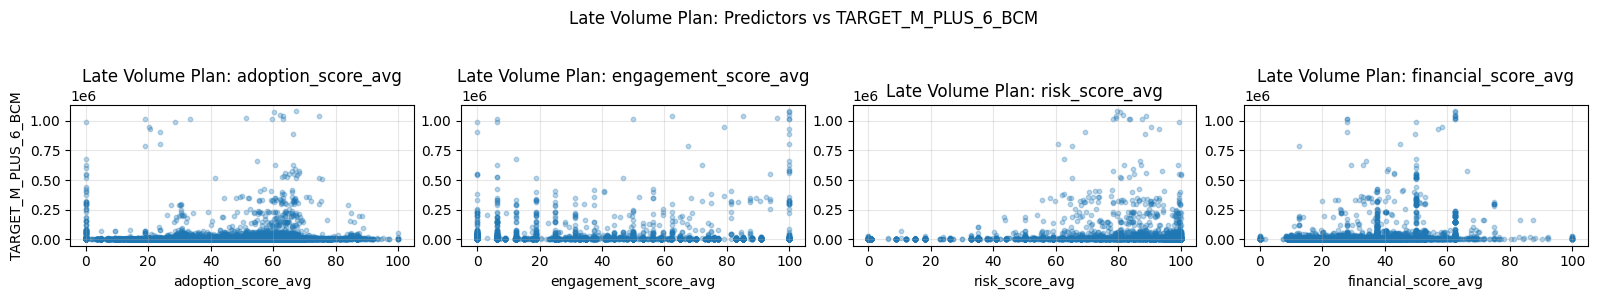

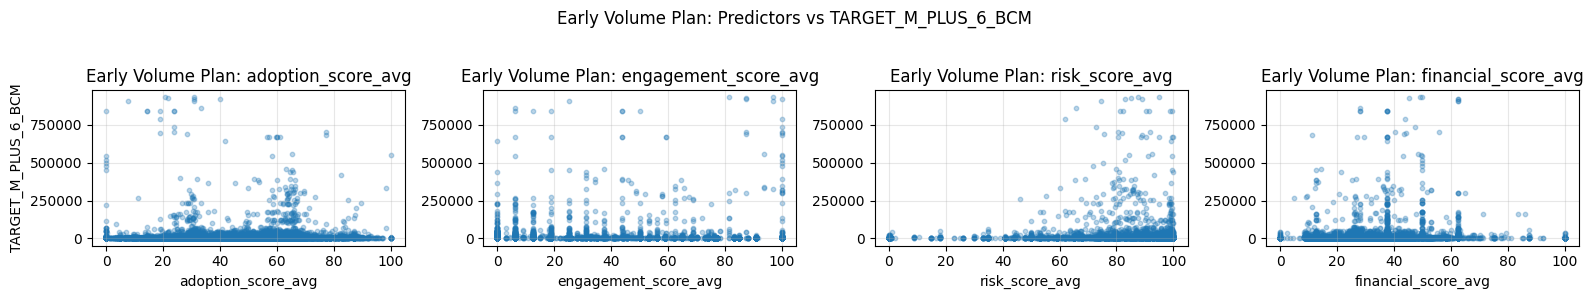

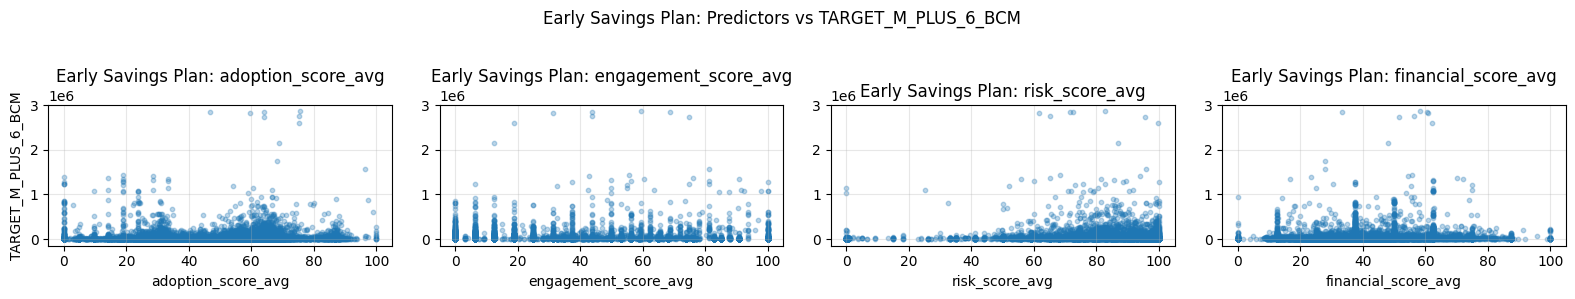

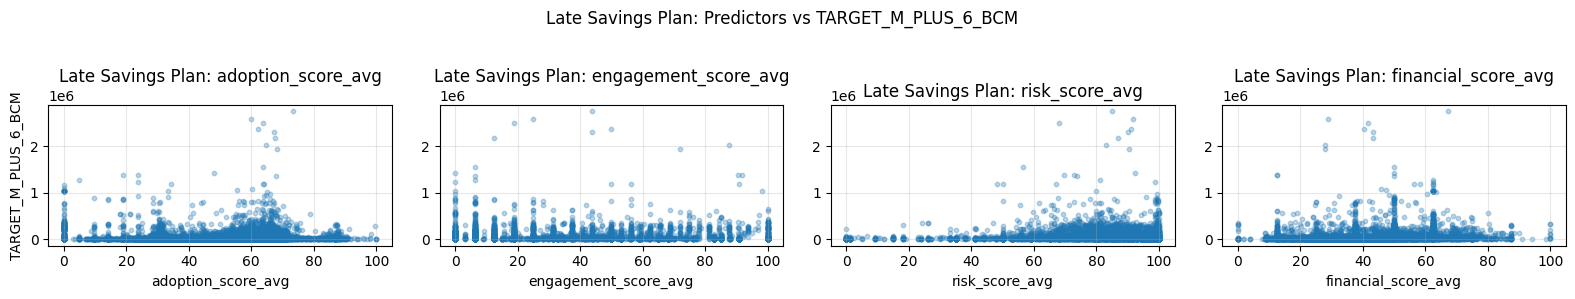

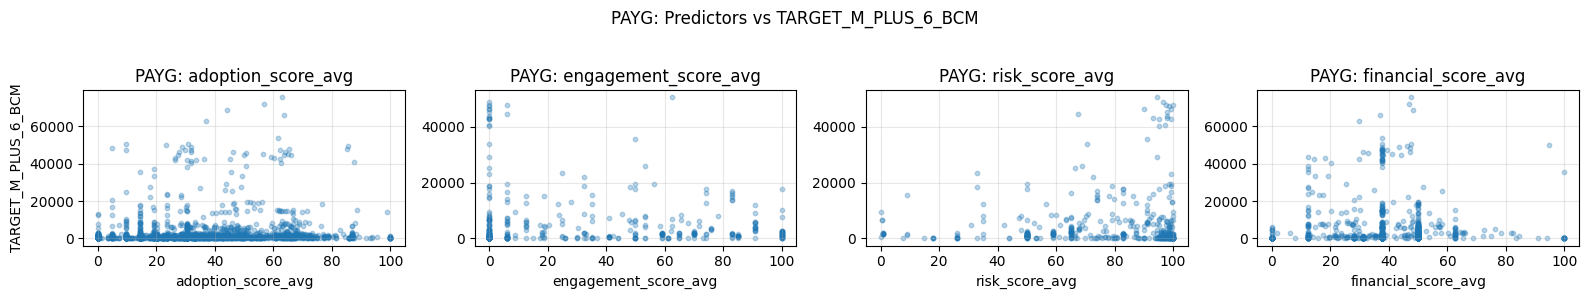

In [51]:
import matplotlib.pyplot as plt

segments = [
    'Late Volume Plan', 'Early Volume Plan',
    'Early Savings Plan', 'Late Savings Plan', 'PAYG'
]
predictors = [
    'adoption_score_avg', 'engagement_score_avg', 'risk_score_avg', 'financial_score_avg'
]
target = 'TARGET_M_PLUS_6_BCM'

for seg in segments:
    seg_df = df[df['SEGMENT_NAME'] == seg].copy()
    # Compute predictor averages if not already present
    seg_df['adoption_score_avg'] = seg_df[['USER_ACTIVATION_PERCENTAGE_HSCORE', 'PRODUCT_STICKINESS_RATIO_HSCORE',
                                           'USER_STICKINESS_RATIO_HSCORE', 'PRODUCT_UTILIZATION_RATE_HSCORE']].astype(float).mean(axis=1)
    seg_df['engagement_score_avg'] = seg_df[['ENGAGEMENT_SCORE_HSCORE', 'OPEN_TICKETS_HSCORE','AVG_CSAT_SCORE_HSCORE']].astype(float).mean(axis=1)
    seg_df['risk_score_avg'] = seg_df[['PCT_P1_CASES_HSCORE', 'PCT_P1P2_CASES_HSCORE', 'RESOLUTION_RATE_HSCORE',
                                       'CHURN_RISK_SCORE_HSCORE', 'SENTIMENT_SCORE_HSCORE','RENEWAL_URGENCY_MONTHS_HSCORE','MTHLY_FTTR_50_HSCORE']].astype(float).mean(axis=1)
    seg_df['financial_score_avg'] = seg_df[['REVENUE_GROWTH_HSCORE','OVERAGE_SCORE_HSCORE','CONTRACT_LENGTH_SCORE_HSCORE']].astype(float).mean(axis=1)
    seg_df[target] = pd.to_numeric(seg_df[target], errors='coerce')
    plt.figure(figsize=(16, 3))
    for i, pred in enumerate(predictors):
        plt.subplot(1, 4, i+1)
        plt.scatter(seg_df[pred], seg_df[target], alpha=0.3, s=10)
        plt.xlabel(pred)
        plt.ylabel(target if i == 0 else "")
        plt.title(f"{seg}: {pred}")
        plt.grid(True, alpha=0.3)
    plt.suptitle(f"{seg}: Predictors vs {target}")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

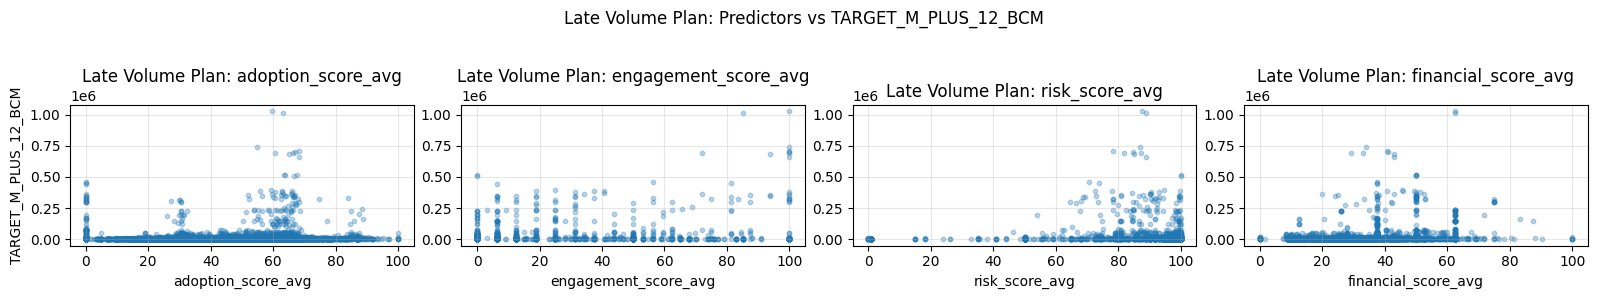

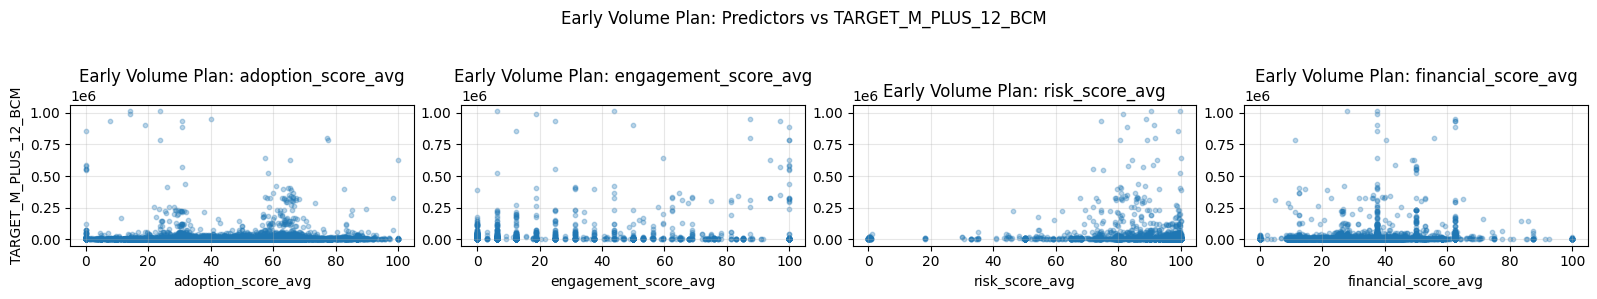

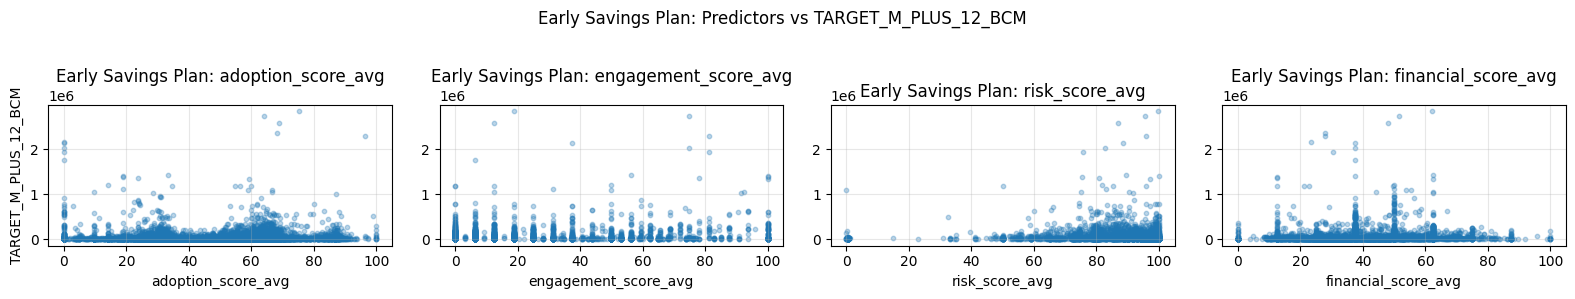

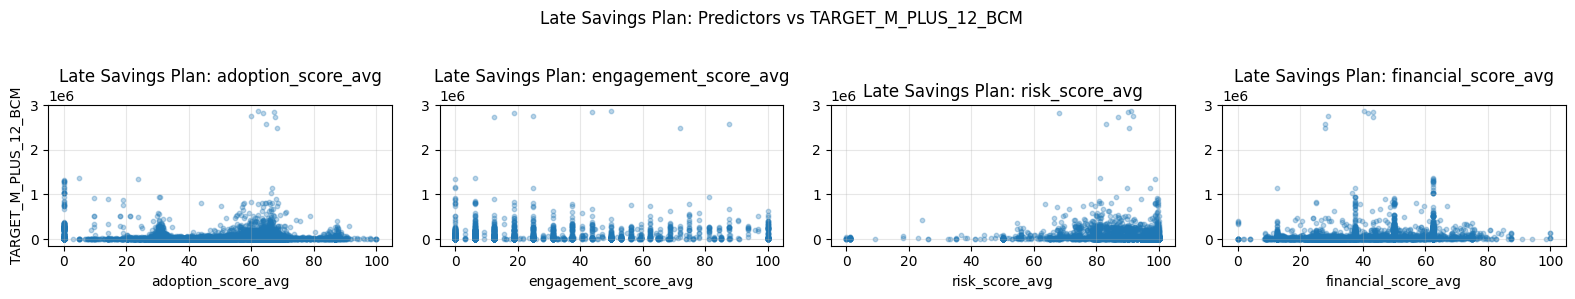

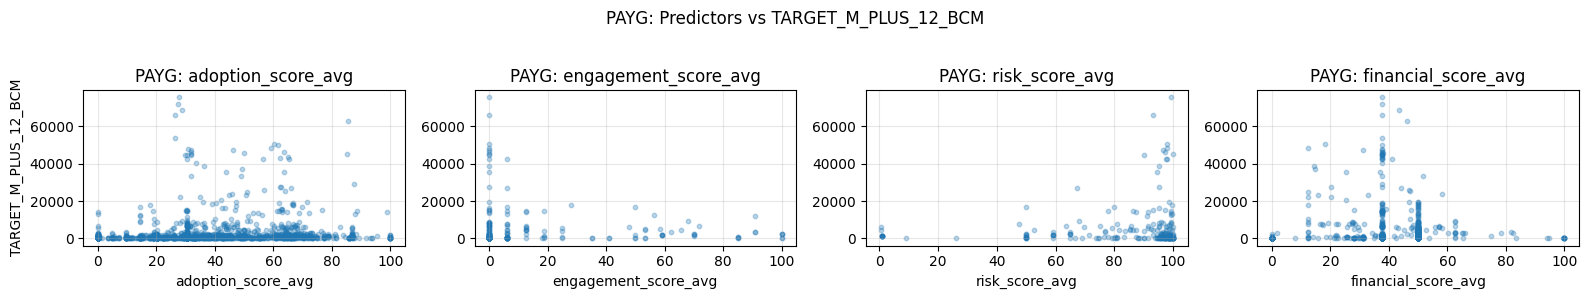

In [52]:
import matplotlib.pyplot as plt

segments = [
    'Late Volume Plan', 'Early Volume Plan',
    'Early Savings Plan', 'Late Savings Plan', 'PAYG'
]
predictors = [
    'adoption_score_avg', 'engagement_score_avg', 'risk_score_avg', 'financial_score_avg'
]
target = 'TARGET_M_PLUS_12_BCM'

for seg in segments:
    seg_df = df[df['SEGMENT_NAME'] == seg].copy()
    # Compute predictor averages if not already present
    seg_df['adoption_score_avg'] = seg_df[['USER_ACTIVATION_PERCENTAGE_HSCORE', 'PRODUCT_STICKINESS_RATIO_HSCORE',
                                           'USER_STICKINESS_RATIO_HSCORE', 'PRODUCT_UTILIZATION_RATE_HSCORE']].astype(float).mean(axis=1)
    seg_df['engagement_score_avg'] = seg_df[['ENGAGEMENT_SCORE_HSCORE', 'OPEN_TICKETS_HSCORE','AVG_CSAT_SCORE_HSCORE']].astype(float).mean(axis=1)
    seg_df['risk_score_avg'] = seg_df[['PCT_P1_CASES_HSCORE', 'PCT_P1P2_CASES_HSCORE', 'RESOLUTION_RATE_HSCORE',
                                       'CHURN_RISK_SCORE_HSCORE', 'SENTIMENT_SCORE_HSCORE','RENEWAL_URGENCY_MONTHS_HSCORE','MTHLY_FTTR_50_HSCORE']].astype(float).mean(axis=1)
    seg_df['financial_score_avg'] = seg_df[['REVENUE_GROWTH_HSCORE','OVERAGE_SCORE_HSCORE','CONTRACT_LENGTH_SCORE_HSCORE']].astype(float).mean(axis=1)
    seg_df[target] = pd.to_numeric(seg_df[target], errors='coerce')
    plt.figure(figsize=(16, 3))
    for i, pred in enumerate(predictors):
        plt.subplot(1, 4, i+1)
        plt.scatter(seg_df[pred], seg_df[target], alpha=0.3, s=10)
        plt.xlabel(pred)
        plt.ylabel(target if i == 0 else "")
        plt.title(f"{seg}: {pred}")
        plt.grid(True, alpha=0.3)
    plt.suptitle(f"{seg}: Predictors vs {target}")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()